#### 3. Correlacion

#### 1. Lectura del archivo a utilizar

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("../database/data_procesada/1_magnitud-dañosEco-Deaths.xlsx")

df.drop(["Unnamed: 0"], axis=1, inplace=True) # Se elimina una columna con datos incoherentes.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   País              175 non-null    object        
 1   Region            175 non-null    object        
 2   Location          175 non-null    object        
 3   Magnitud          175 non-null    float64       
 4   Clasificación     175 non-null    object        
 5   Daños Económicos  175 non-null    int64         
 6   Muertes Totales   175 non-null    int64         
 7   Fecha             175 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 11.1+ KB


In [35]:
df.head()

,País,Region,Location,Magnitud,Clasificación,Daños Económicos,Muertes Totales,Fecha
0,Mexico,Americas,"Distrito Federal, Mexico city, Michoacan provi...",122621.0,Hydrological,16000,41,2010-01-26
1,Portugal,Europe,Funchal district (Ilha Da Madera province),483.0,Hydrological,1350000,43,2010-02-20
2,Colombia,Americas,"Sucre, Bolivar, Cordoba, Antioquia, Atlantico,...",1140146.0,Hydrological,1000000,418,2010-04-06
3,Sri Lanka,Asia,"Galle, Matara districts (Southern province), R...",19210.0,Hydrological,105000,28,2010-05-14
4,France,Europe,"Draguignan, Les Arcs, Figanières, Roquebrune s...",7700.0,Hydrological,1500000,25,2010-06-15


#### 2. Ejemplo de como se correlacionan en un caso real

En este ejemplo, tenemos dos paises, Mexico y Portugal, la cantidad de fallecidos es similar, uno tiene 41 y el otro 43
Pero notamos lo siguiente, en los daños economicos hay un gasto mayor en Portugal con una magnitud Menor a la de Mexico

¿A que se debe esto?: A varios factores realmente, por ejemplo la infraestructura o zona afectada puede este mas preparada 
para este tipo de desastre, ya sea porque es una zona propensa a inundaciones o que en la zona sea de un lugar de bajo recursos
donde la perdida material es menor.

Estos detalles lo retomaremos mas adelante en nuestro analisis

In [82]:
magnitud_fallecidos_economic_damage = df[["País", "Muertes Totales", "Daños Económicos", "Magnitud", "Fecha"]]
magnitud_fallecidos_economic_damage.head(2)

,País,Muertes Totales,Daños Económicos,Magnitud,Fecha
0,Mexico,41,16000,122621.0,2010-01-26
1,Portugal,43,1350000,483.0,2010-02-20


* Aqui tenemos un describe, con las estadisticas del dataframe que generamos

In [78]:
magnitud_fallecidos_economic_damage.describe()

,Muertes Totales,Daños Económicos,Magnitud,Fecha
count,175.000000,1.750000e+02,1.750000e+02,175
mean,116.548571,1.376487e+06,1.678832e+05,2014-05-29 12:28:48
min,1.000000,1.760000e+02,4.830000e+02,2010-01-26 00:00:00
25%,9.000000,2.200000e+04,2.026900e+04,2012-01-27 00:00:00
50%,32.000000,1.200000e+05,5.513895e+04,2013-12-27 00:00:00
75%,67.000000,6.000000e+05,1.545815e+05,2016-07-08 12:00:00
max,6054.000000,4.000000e+07,2.643786e+06,2021-07-12 00:00:00
std,489.560026,4.844265e+06,3.182548e+05,NaN


#### Grafica de correlacion

Esta grafica funciona de la siguiente manera:

* El numero 1: representa la relacion entre dos variables total, que son iguales o que estan muy relacionada
entre mas los valores se acerquen al numero 1, mas relacionadas estan.

    En nuestro grafico hay tres numeros 1, pero estan relacionando o comparando variables del mismo nombre, osea que son iguales, por lo tanto
    esta relacion es perfecta entre las variables, porque se comparan a ellas mismas entre si.

* El numero 0: representa la relacion de dos variables que son diferentes, entre mas cerca del 0 este una variable menos se relaciona con las demas
en nuestro caso hay tres valores: 0.14, 0.027 y 0.055, estos valores significan que la relacion es muy DEBIL y no se relacionan en casi nada, osea
una variable no depende de la otra.

    En primera instancian, si nos preguntan si la magnitud del desastre tiene que ver directamente con el numero de muertes y los daños
    economicos, decimos si, sin pensarlo, pero como vemos en la grafica esto no es verdad.


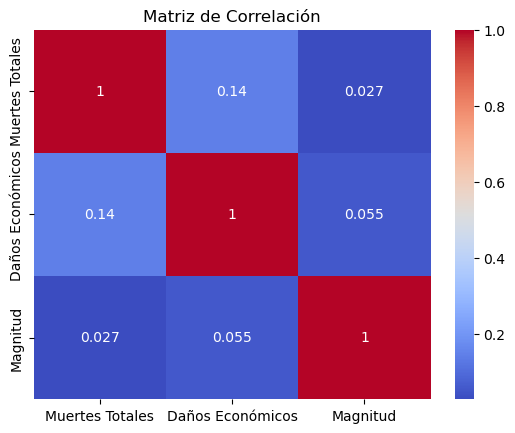

In [117]:
correlación = df[["Muertes Totales", "Daños Económicos", "Magnitud"]].corr()
sns.heatmap(correlación, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

La correlacion entre variables es la siguiente:

Muertes Totales - Daños Economicos = 0.14.\
Muertes Totales - Magnitud = 0.027.\
Daño Economico - Magnitud = 0.055.

Esto segun el texto que explicaba como funcionaba el mapa de calor, significa\
que la relacion entre esas variables como es muy cercana a 0, es casi nula, o muy debil\
que lo que guarda cada variable no tiene nada que ver con lo demas, pero ¿Por que?

In [145]:
magnitud_fallecidos_economic_damage.head(2)

,País,Muertes Totales,Daños Económicos,Magnitud,Fecha
0,Mexico,41,16000,122621.0,2010-01-26
1,Portugal,43,1350000,483.0,2010-02-20


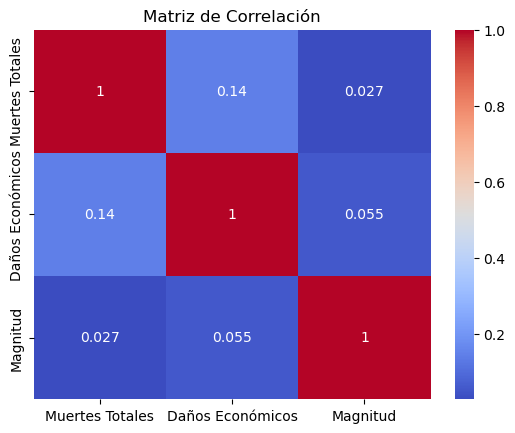

In [147]:
correlación = df[["Muertes Totales", "Daños Económicos", "Magnitud"]].corr()
sns.heatmap(correlación, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

Volviendo a este ejemplo, leemos lo siguiente:

* Mexico: 41 muertes, $16,000 en daños económicos, magnitud de 122,621 km^2
  
* Portugal: 43 muertes, $1,350,000 en daños económicos, magnitud de 483 km^2

Ahora teniendo en cuenta las correlaciones que obtuvimos de la grafica, la analisaremos una a una.

#### 4. Analisis de Correlacion:

* **Muertes Totales - Daños Económicos**: Los dos paises, a pesar de tener una cantidad de fallecidos muy similar, representan un daño
  economico muy diferente, esto se interpreta como que el area afectada y lo que contenia como la infraestructura, el valor de los bienes y
  la preparacion para los desastre estan involucrados.

  En este caso especifico debemos estudiar la zona afectada de ambos paises, que tipo de infraestructura contenia en la fecha que fue producido el
  desastre y como la frecuencias de inundaciones en estos lugares influyo directamente en la construccion de dicha infraestructura para minimizar el
  daño economico al minimo, seria cuestion de profundizar en estos datos y buscar la respuesta para dicho caso.

* **Daño Económico - Magnitud**: Aqui sucede algo parecido al caso anterior, la magnitud del desastre, especificamente en estos tipos de desastre
  no es un buen predicador del daño economico, debido a que estos dependen de mas variables o factores como lo es la densidad poblacional del area
  afectada, debido a que normalmente si un sitio es propenso a las inundaciones se prepara mejor la infraestructura, hay poco habitantes y se minimiza
  el daño.

* **Muertes Totales - Magnitud**: En este caso la magnitud de nuestro problema se tienen que añadir mas factores, no simplemente los fallecidos, esto
  hay que agregarles variables extra que ya discutimos en los anteriores puntos, densidad poblacional, preparacion de la zona afectada, etc. Ya que por
  ejemplo una inundacion extensa en un area poco poblada, por logica no va a causar casi muertes, ya sea porque la poblacion es mas facil de evacuar o
  estan preparados para este tipo de desastres.

#### Naturaleza no lineal

Este fenomeno, por llamarlo de alguna manera, se llama naturaleza no lineal, que son sistemas, procesos o relaciones donde las variables
no cambian de manera proporcional entre si, sino que un pequeño cambio en una variable puede producir un gran efecto en otra, y por lo tanto
es mas complejo de analisar que un sistema lineal.

En nuestro caso, los desastres naturales hidrologicos es de naturaleza no lineal ya que gracias a otros factores o variables externas que no tenemos pueden variar drasticamente los resultados por ejemplo tenemos un umbral que en la magnitud causan grandes cambios en los daños económicos o las muertes, pero debajo de este umbral la relación podría ser mas debil.

Por lo tanto, los resultados que obtenemos al inicio en la correlacion no quieren decir que esten equivocados, sino que nos faltan variables externas para evaluarlo correctamente en su contexto dado.